## Import and Load

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates


In [2]:
filename = ('Data/london_weather_MODIFIED - london_weather_MODIFIED.csv')
df = pd.read_csv(filename)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [3]:
# Convert date column to datetime dtype
df['datetime'] = pd.to_datetime(df['date'], format = '%Y%m%d')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  int64         
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
 10  datetime          15341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979-01-03
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979-01-04
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979-01-05


In [4]:
# Set datetime column as the index
df = df.set_index('datetime')
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
1979-01-01,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [5]:
# Filter data keeping only 2000 and later
df2 = df.loc['2000':,['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]
df2.info()
df2

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  7281 non-null   float64
 1   mean_temp      7252 non-null   float64
 2   min_temp       7285 non-null   float64
 3   max_temp       7281 non-null   float64
 4   snow_depth     5919 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


In [6]:
# Identifying missing values
df2.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [7]:
df2.describe()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
count,7281.000000,7252.000000,7285.000000,7281.000000,5919.000000
mean,1.723376,11.907308,8.000480,15.810850,0.023146
std,3.675610,5.669191,5.242933,6.526161,0.306467
min,0.000000,-4.100000,-9.400000,-1.200000,0.000000
25%,0.000000,7.600000,4.100000,10.800000,0.000000
50%,0.000000,11.800000,8.200000,15.600000,0.000000
75%,1.800000,16.400000,12.100000,20.700000,0.000000
max,51.600000,29.000000,22.300000,37.900000,12.000000


In [8]:
## interpolating temperature measures
df2['mean_temp'] = df2['mean_temp'].interpolate()
df2['max_temp'] = df2['max_temp'].interpolate()
df2['min_temp'] = df2['min_temp'].interpolate()

In [9]:
df2.isna().sum()

precipitation     390
mean_temp           0
min_temp            0
max_temp            0
snow_depth       1752
dtype: int64

In [10]:
# filling precipitation and snow with 0 based on values in feature
df2['precipitation'] = df2['precipitation'].fillna(0)
df2['snow_depth'] = df2['snow_depth'].fillna(0)

In [11]:
df2.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

## Part 2 Visualizations

**What month had the most precipitation between 2000 through 2010?**

In [12]:
# Filtered years of interest
df3 = df2.loc['2000': '2010']
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4018 entries, 2000-01-01 to 2010-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  4018 non-null   float64
 1   mean_temp      4018 non-null   float64
 2   min_temp       4018 non-null   float64
 3   max_temp       4018 non-null   float64
 4   snow_depth     4018 non-null   float64
dtypes: float64(5)
memory usage: 188.3 KB


In [13]:
# Copied dataframe to resample
ts = df3['precipitation'].copy()
ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2010-12-22', '2010-12-23', '2010-12-24', '2010-12-25',
               '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', name='datetime', length=4018, freq=None)

In [14]:
# Resample data as monthly frequency
ts_MS_res = ts.resample('MS').mean()
ts_MS_res.name = 'Resampled'
ts_MS_res

datetime
2000-01-01    0.461290
2000-02-01    2.144828
2000-03-01    0.432258
2000-04-01    2.393333
2000-05-01    2.206452
                ...   
2010-08-01    2.703226
2010-09-01    1.266667
2010-10-01    1.967742
2010-11-01    0.733333
2010-12-01    0.683871
Freq: MS, Name: Resampled, Length: 132, dtype: float64

In [15]:
# Finding max precipitation
max_date = ts_MS_res.idxmax()
print(max_date)
max_prec = ts_MS_res.loc[max_date]
print(max_prec)

2009-11-01 00:00:00
4.613333333333333


In [16]:
# create the locator to place ticks every 3 months.
loc_3months = mdates.MonthLocator(interval=3)
## for major year ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")

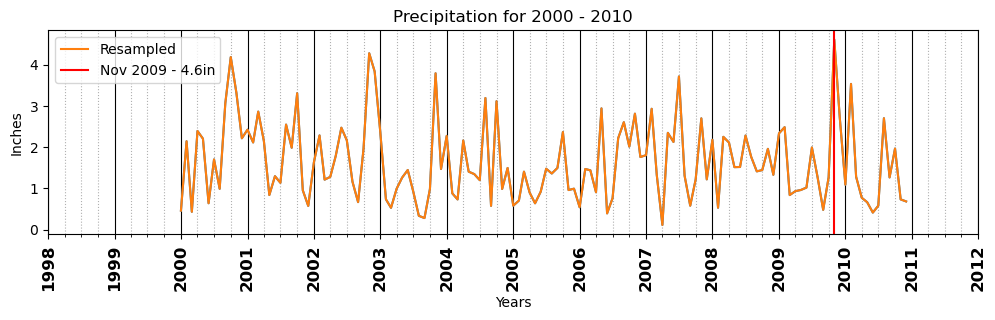

In [17]:
#Visualization
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(ts_MS_res.index, ts_MS_res.values)
ts_MS_res.plot(ax =ax, title='Precipitation for 2000 - 2010', ylabel = 'Inches',
       xlabel = 'Years');

##  Set xticks and xticklables
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' ) 
##  customize minor ticks
ax.xaxis.set_minor_locator(loc_3months)
##  customize major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)

##  Making major/minor gridlines 
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')
plt.axvline(max_date, color = 'r', label = 'Nov 2009 - 4.6in');

## add legend
ax.legend(loc = 'best')

**Which year between 2000-2020 had the coolest average temperature?**

In [25]:
# Finding years of interest
df4 = df2.loc['2000': '2020']
df4.info()
df4.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  7671 non-null   float64
 1   mean_temp      7671 non-null   float64
 2   min_temp       7671 non-null   float64
 3   max_temp       7671 non-null   float64
 4   snow_depth     7671 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


In [19]:
# Copy to resample
ts2 = df4['mean_temp'].copy()
ts2.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='datetime', length=7671, freq=None)

In [27]:
# Resample as yearly
agg_specs = {"mean_temp":"mean","min_temp":"min",'max_temp':'max',
             'precipitation':'sum', 'snow_depth':'sum'}

ts_YR_res = df4.resample("A").agg(agg_specs)
ts_YR_res.head()


,mean_temp,min_temp,max_temp,precipitation,snow_depth
datetime,,,,,
2000-12-31,11.575683,-5.5,30.8,722.8,3.0
2001-12-31,11.331507,-4.3,31.9,675.4,0.0
2002-12-31,12.084247,-5.3,32.5,751.9,0.0
2003-12-31,12.114521,-5.1,37.9,460.3,9.0
2004-12-31,11.900683,-4.8,30.5,593.7,2.0


In [28]:
min_date = ts_YR_res.idxmin()
print(min_date)
min_temp = ts_YR_res.loc[min_date]
print(min_temp)

mean_temp       2010-12-31
min_temp        2010-12-31
max_temp        2007-12-31
precipitation   2005-12-31
snow_depth      2001-12-31
dtype: datetime64[ns]
            mean_temp  min_temp  max_temp  precipitation  snow_depth
datetime                                                            
2010-12-31  10.657397      -9.4      31.2          472.8        50.0
2010-12-31  10.657397      -9.4      31.2          472.8        50.0
2007-12-31  11.944384      -5.2      29.0          649.1         6.0
2005-12-31  11.822877      -4.8      32.6          421.6         3.0
2001-12-31  11.331507      -4.3      31.9          675.4         0.0


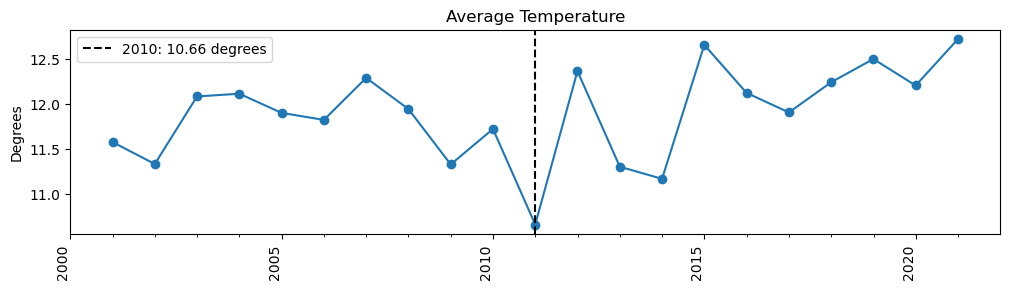

In [32]:
fig, ax = plt.subplots(figsize=(12,3))
ax.plot( ts_YR_res['mean_temp'], marker='o')
ax.set(title="Average Temperature", ylabel='Degrees')


date_min = ts_YR_res['mean_temp'].idxmin()
min_temp = ts_YR_res['mean_temp'].min()


label_txt = f"{date_min.strftime('%Y')}: {min_temp:.2f} degrees"
ax.axvline(date_min,color='k',ls='--', label= label_txt)
ax.legend()



# customize major ticks 
major_loc =  mdates.YearLocator(5)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# # customize minor ticks
maxor_loc =  mdates.YearLocator()

ax.xaxis.set_minor_locator(maxor_loc)
fig.autofmt_xdate(which='major', rotation=90)